# Test_Image_Classification 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import seaborn as sb

# accuracy measurement 
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

# model module
import tensorflow as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential
from tqdm import tqdm
import cv2
from imutils import paths

In [10]:
class_name=['cats','dogs'] # list of categorical 

In [11]:
class_name_label={classname: i for i, classname in enumerate(class_name)} #lable encoder 

In [12]:
image_shape = (128,128) #image shape value 

File Name: cat.4001.jpg


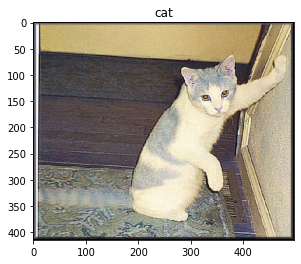

In [17]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread('/content/drive/MyDrive/Dataset/DL  dataset/image_dataset_cat_dog/test_set/cats/cat.4001.jpg')
file ="/content/drive/MyDrive/Dataset/DL  dataset/image_dataset_cat_dog/test_set/cats/cat.4001.jpg"
fileName = file.split('/')[9]
print("File Name:", fileName)
classname = file.split('/')[9].split('.')[0]
plt.imshow(imageData)
# To remove annoying text
plt.title(classname)
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
def dataloder():
    datasetpath=['/content/drive/MyDrive/Dataset/DL  dataset/image_dataset_cat_dog/training_set','/content/drive/MyDrive/Dataset/DL  dataset/image_dataset_cat_dog/test_set']
    imagedataoutput=[]
    for i in datasetpath:
        images=[]
        lables=[]
        print('Counting:{}'.format(i))
        for j in os.listdir(i):
            lable=class_name_label[j]
            for imagefile in tqdm(os.listdir(os.path.join(i,j))):
                imagepath=os.path.join(os.path.join(i,j),imagefile)
                image=cv2.imread(imagepath)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_shape)
                images.append(image)
                lables.append(lable)
                
        images=np.array(images,dtype='float32')
        lables=np.array(lables,dtype='float32')
        imagedataoutput.append((images,lables))
        
    return imagedataoutput     
        

In [19]:
(train_image, train_labels), (test_image, test_labels) = dataloder()

Counting:/content/drive/MyDrive/Dataset/DL  dataset/image_dataset_cat_dog/training_set


100%|██████████| 4000/4000 [01:01<00:00, 65.03it/s] 


Counting:/content/drive/MyDrive/Dataset/DL  dataset/image_dataset_cat_dog/test_set


100%|██████████| 1000/1000 [00:13<00:00, 76.69it/s]


In [20]:
# Scaleing image featues 
train_image = train_image/255.0
test_image = test_image/255.0

In [21]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization(class_name, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(class_name[int(imagelabel[i])]))
    plt.show()

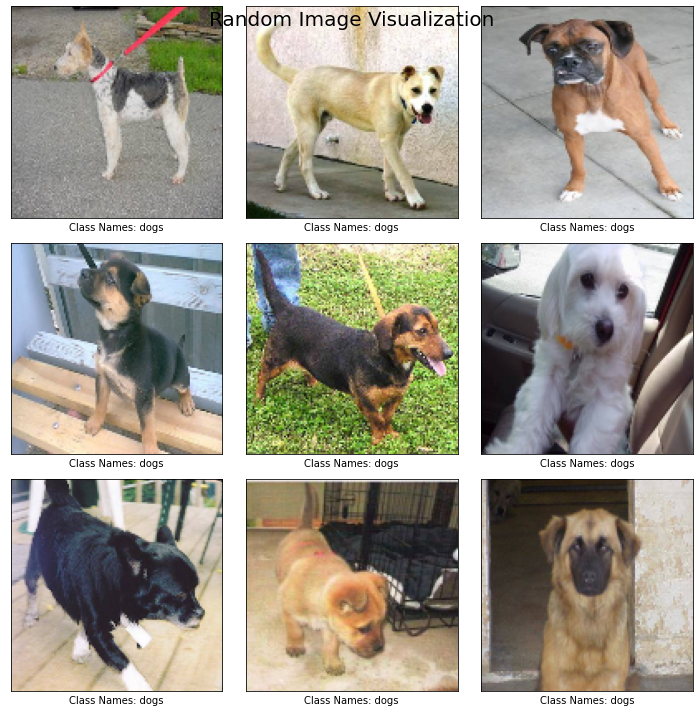

In [22]:
ImageVisualization(class_name, train_image, train_labels)

In [23]:
model = Sequential()


# #Input Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (128,128, 3)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #2nd Layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128,kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #3rd Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #4th Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




# #5th Layer
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #6th layer
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


model.add(Flatten())


# #Output Layer
model.add(Dense(256, activation = "relu")) 
model.add(Dense(128, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

In [25]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [26]:
modelData = model.fit(train_image,
                     train_labels,
                      epochs=5,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/5
50/50 [==============================] - 45s 539ms/step - loss: 3.7867 - accuracy: 0.6252 - val_loss: 0.9821 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 [==============================] - 25s 497ms/step - loss: 0.6621 - accuracy: 0.6250 - val_loss: 0.9818 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 [==============================] - 26s 511ms/step - loss: 0.6625 - accuracy: 0.6250 - val_loss: 0.8957 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 [==============================] - 26s 519ms/step - loss: 0.6622 - accuracy: 0.6250 - val_loss: 0.9823 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 [==============================] - 26s 511ms/step - loss: 0.6636 - accuracy: 0.6250 - val_loss: 0.9959 - val_accuracy: 0.0000e+00


In [27]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

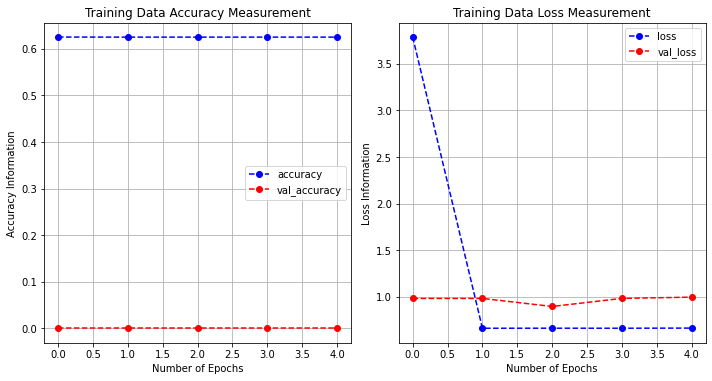

In [28]:
accuracy_and_loss_Plot(modelData)

In [31]:
testLoss = model.evaluate(test_image, test_labels)

63/63 [==============================] - 5s 62ms/step - loss: 0.7285 - accuracy: 0.5000


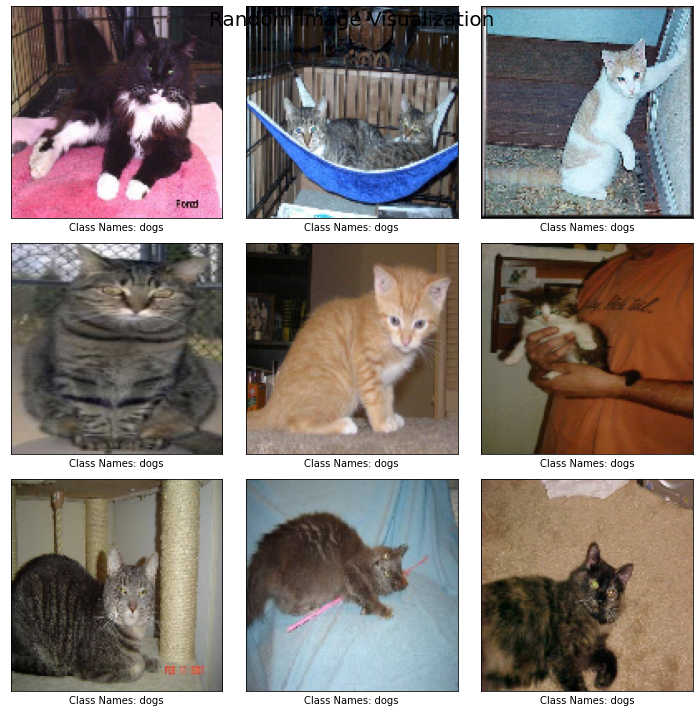

In [34]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(class_name, test_image, predictedDataLabels)

In [48]:
def missClassification2(class_name, ImageData, ImageLabels, predictedDataLabels):
    
    result = (ImageLabels == predictedDataLabels)
    #print(result)
    missclass = np.where(result == 0)
    #print(int(missClass))
    missclass=np.asarray(missclass)
    missclass = missclass.flatten()
    
    
    missclassImage = []
    missclasslabels =[]
    for k in missclass:
      missclassImage.append(ImageData[k])
      missclasslabels.append(predictedDataLabels[k])
    print("Miss Classification Image Data is: ")
    ImageVisualization(class_name, missclassImage, missclasslabels)

Miss Classification Image Data is: 


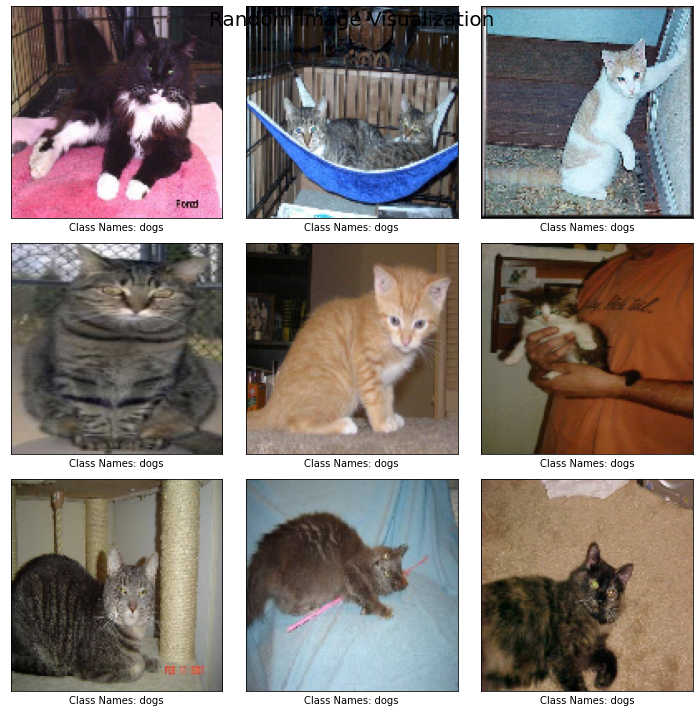

In [49]:
missClassification2(class_name, test_image, test_labels, predictedDataLabels)

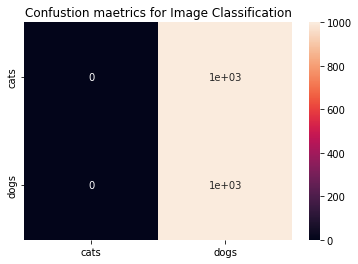

In [51]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sb.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=class_name,
           yticklabels=class_name, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()